I am  going to apply 6 Supervised machine learning models on the given dataset.The strategy is to apply default model first with no tuning of the hyperparameter and then tuned them with different hyperparameter values and then I'll plot ROC curve to select the best machine learning model.The models used are as follows:
**1) Principal Component Analysis
**2)Logistic Regression**
 **3)Gaussian Naive Bayes**
  **4)Support Vector Machine**
  **5)Random Forest Classifier** 
  **6)Decision trees**
   **7)Simple neural network**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

mushrooms.csv



###  Importing all the libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Reading the file 

In [3]:
data = pd.read_csv("../input/mushrooms.csv")
data.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


### Let us check if there is any null values

In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
data['class'].unique()

array(['p', 'e'], dtype=object)

**Thus we have two claasification. Either the mushroom is poisonous or edible**

In [6]:
data.shape

(8124, 23)

**Thus we have 22 features(1st one is label)  and 8124 instances.Now let us check which features constitutes maximum information.** 

**We can see that the dataset has values in strings.We need to convert all the unique values to integers. Thus we perform label encoding on the data.**

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Checking the encoded values

In [8]:
data['stalk-color-above-ring'].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8])

In [9]:
print(data.groupby('class').size())

class
0    4208
1    3916
dtype: int64


### Plotting boxplot to see the distribution of the data

AttributeError: module 'seaborn' has no attribute 'plt'

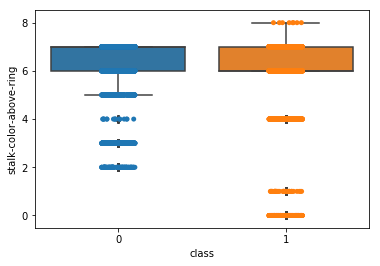

In [10]:
'''
# Create a figure instance
fig, axes = plt.subplots(nrows=2 ,ncols=2 ,figsize=(9, 9))

# Create an axes instance and the boxplot
bp1 = axes[0,0].boxplot(data['stalk-color-above-ring'],patch_artist=True)

bp2 = axes[0,1].boxplot(data['stalk-color-below-ring'],patch_artist=True)

bp3 = axes[1,0].boxplot(data['stalk-surface-below-ring'],patch_artist=True)

bp4 = axes[1,1].boxplot(data['stalk-surface-above-ring'],patch_artist=True)
'''
ax = sns.boxplot(x='class', y='stalk-color-above-ring', 
                data=data)
ax = sns.stripplot(x="class", y='stalk-color-above-ring',
                   data=data, jitter=True,
                   edgecolor="gray")
sns.plt.title("Class w.r.t stalkcolor above ring",fontsize=12)

**Separating features and label**

In [11]:
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [12]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [13]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [14]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


# Standardising the data

In [15]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ..., 
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

**Note**: We can avoid PCA here since the dataset is very small.

# Principal Component Analysis

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ -5.74321902e-01,  -9.75781349e-01,  -1.22176154e+00, ...,
         -2.08581362e-01,   8.13996758e-03,  -1.39200716e-17],
       [ -2.28210230e+00,   2.79066333e-01,  -1.20049669e+00, ...,
          1.52238789e-01,  -1.96446132e-01,   3.80741381e-17],
       [ -1.85803562e+00,  -2.70972362e-01,  -1.37237069e+00, ...,
          2.57581784e-01,  -3.62577199e-01,   1.68901456e-17],
       ..., 
       [ -1.62151632e+00,  -7.57536709e-01,   2.73357994e+00, ...,
         -1.42532241e+00,   6.36990122e-01,   6.13288755e-19],
       [  3.67060561e+00,  -1.03277450e+00,   1.68459501e-01, ...,
          9.41440123e-02,  -6.43462238e-02,  -3.48398562e-20],
       [ -1.57520272e+00,  -1.22858140e+00,   2.44722789e+00, ...,
         -8.04626064e-01,   5.90315263e-01,   6.50317931e-20]])

In [17]:
covariance=pca.get_covariance()
#covariance

In [18]:
explained_variance=pca.explained_variance_
explained_variance

array([  3.87410924e+00,   2.60339434e+00,   2.40073834e+00,
         2.16674719e+00,   1.70303181e+00,   1.39495575e+00,
         9.78803667e-01,   9.51936841e-01,   7.70036405e-01,
         7.11748353e-01,   5.77556532e-01,   5.42484855e-01,
         5.09631267e-01,   4.77214086e-01,   3.84467203e-01,
         3.11228233e-01,   2.18649656e-01,   1.59514884e-01,
         1.31521687e-01,   7.31993474e-02,   6.16155691e-02,
         6.04353488e-34])

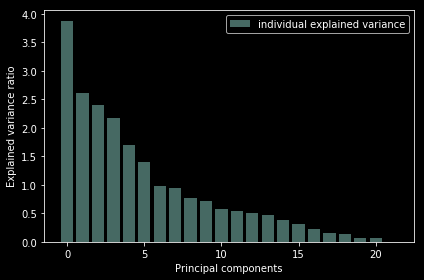

In [19]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**We can see that the last 4 components has less amount of variance  of the data.The 1st 17 components retains more than 90% of the data.**

### Let us take only first two principal components and visualise it using K-means clustering

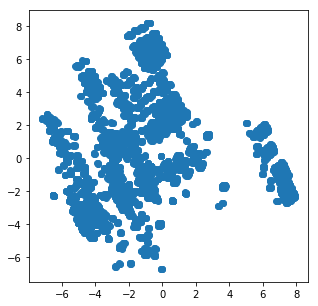

In [20]:
N=data.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

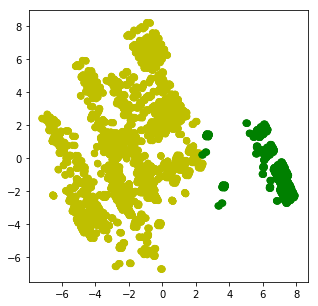

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

### Thus using K-means we are able segregate 2 classes well using the first two components with maximum variance.

# Performing PCA by taking 17 components with maximum Variance

In [22]:
pca_modified=PCA(n_components=17)
pca_modified.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.51996599,
        -0.78254366,  1.12025933],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.11307822,
        -0.73093408, -0.01817413],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.01652548,
        -0.6561675 ,  0.10791396],
       ..., 
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.51961303,
        -0.70768708,  0.22578534],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.08688401,
        -0.11464249, -0.14801392],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.91606764,
        -0.77988482, -0.30141893]])

### Splitting the data into training and testing dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# Default Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [25]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

In [27]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]])

In [28]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.95793885601577911

In [29]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9902988924290701

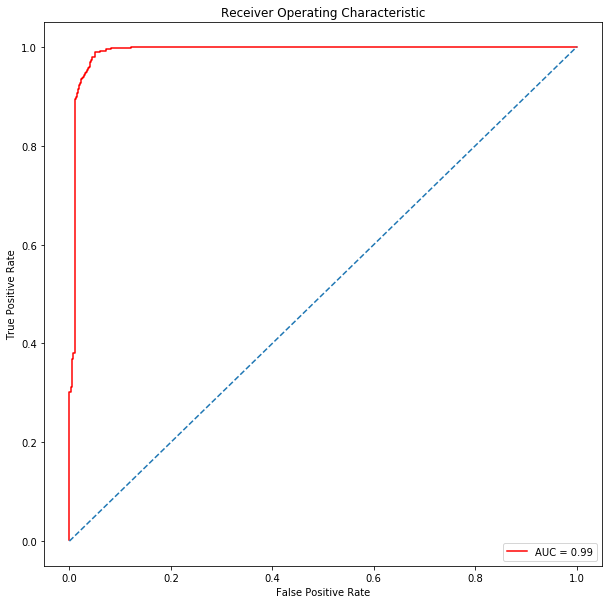

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Logistic Regression(Tuned model)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

**L1 and L2 are regularization parameters.They're used to avoid overfiting.Both L1 and L2 regularization prevents overfitting by shrinking (imposing a penalty) on the coefficients.**  
    **L1 is the first moment norm |x1-x2| (|w| for regularization case) that is simply the absolute dıstance between two points where L2 is second moment norm corresponding to Eucledian Distance that is  |x1-x2|^2 (|w|^2 for regularization case).**     
       **In simple words,L2 (Ridge) shrinks all the coefficient by the same proportions but eliminates none, while L1 (Lasso) can shrink some coefficients to zero, performing variable selection.
If all the features are correlated with the label, ridge outperforms lasso, as the coefficients are never zero in ridge. If only a subset of features are correlated with the label, lasso outperforms ridge as in lasso model some coefficient can be shrunken to zero.**

### Taking a look at the correlation 

In [32]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


**The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the tuned_parameter.The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.**

In [33]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

In [34]:
LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
print(LR.best_params_)

{'C': 100, 'penalty': 'l2'}


In [36]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

In [37]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[824,  21],
       [ 23, 757]])

In [38]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.97      0.98      0.97       845\n          1       0.97      0.97      0.97       780\n\navg / total       0.97      0.97      0.97      1625\n'

In [39]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9728303747534518

In [40]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.99162494310423299

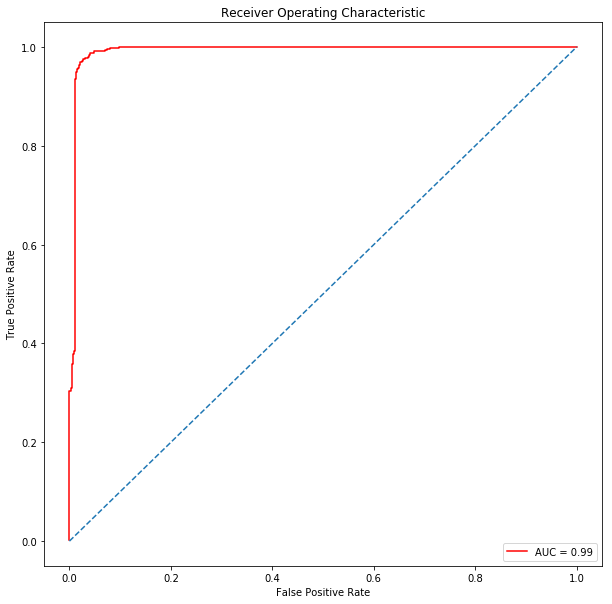

In [41]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [42]:
LR_ridge= LogisticRegression(penalty='l2')
LR_ridge.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
y_prob = LR_ridge.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR_ridge.score(X_test, y_pred)

1.0

In [44]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]])

In [45]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.96      0.96      0.96       845\n          1       0.96      0.95      0.96       780\n\navg / total       0.96      0.96      0.96      1625\n'

In [46]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.95793885601577911

In [47]:

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9902988924290701

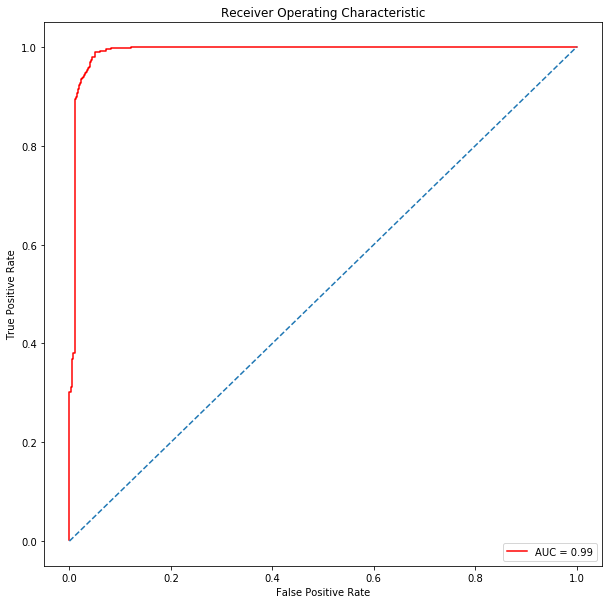

In [48]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Gaussian Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB(priors=None)

In [50]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)

1.0

In [51]:
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 1625 points : 111


In [52]:
scores = cross_val_score(model_naive, X, y, cv=10, scoring='accuracy')
print(scores)

[ 0.59778598  0.78843788  0.97908979  0.9803198   0.84870849  0.81303813
  0.81034483  0.81650246  0.85326757  0.97533909]


In [53]:
scores.mean()

0.84628340228874954

In [54]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[786,  59],
       [ 52, 728]])

In [55]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.94      0.93      0.93       845\n          1       0.93      0.93      0.93       780\n\navg / total       0.93      0.93      0.93      1625\n'

In [56]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9317554240631164

In [57]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9592201486876043

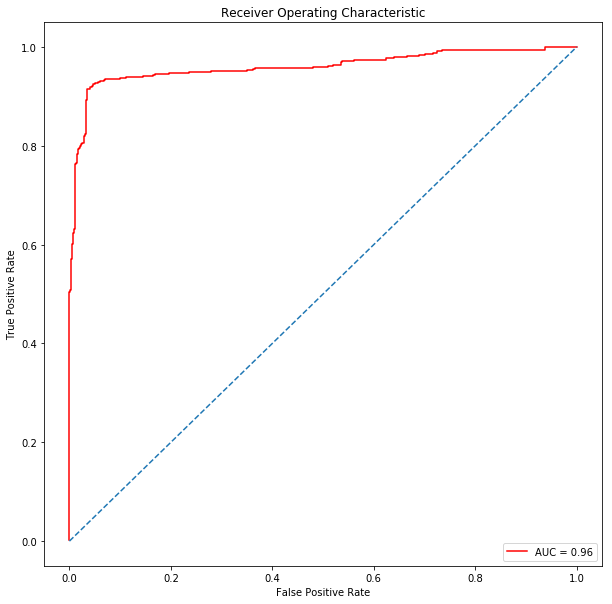

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Support Vector Machine

In [59]:
from sklearn.svm import SVC
svm_model= SVC()

The **gamma** parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The **gamma** parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The **C** parameter trades off misclassification of training examples against simplicity of the decision surface. A low **C** makes the decision surface smooth, while a high **C** aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

# Support Vector Machine without polynomial kernel

In [60]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the tuned_parameter**.The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.
But it is proving computationally expensive here.So I am opting for RandomizedSearchCV.

RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:
1)A budget can be chosen independent of the number of parameters and possible values.
2)Adding parameters that do not influence the performance does not decrease efficiency.

In [61]:
from sklearn.grid_search import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [62]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [63]:
print(model_svm.grid_scores_)

[mean: 0.97615, std: 0.00607, params: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}, mean: 0.95738, std: 0.00848, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 500}, mean: 0.99031, std: 0.00372, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 1, 'C': 500}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 1, 'C': 10}, mean: 0.96046, std: 0.00611, params: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 500}, mean: 0.98738, std: 0.00329, params: {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 1, 'C': 100}, mean: 0.94784, std: 0.00840, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 1}, mean: 1.00000, std: 0.00000, params: {'

In [64]:
print(model_svm.best_params_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}


In [65]:

y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [66]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [67]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [68]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [69]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

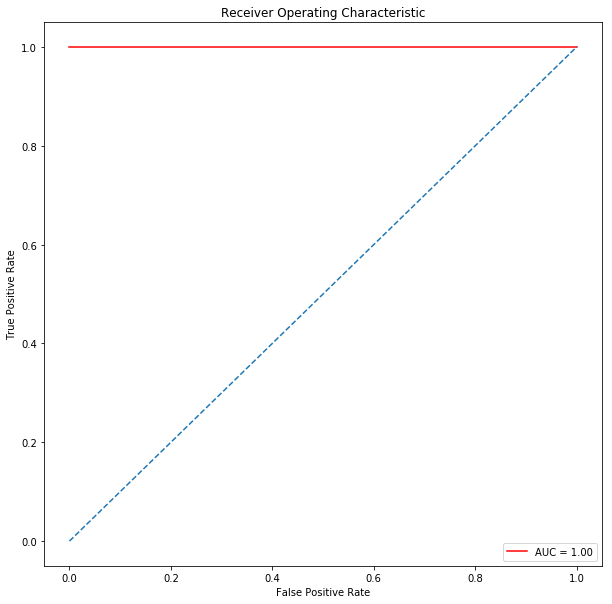

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Support Vector machine with polynomial Kernel

In [71]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [72]:
from sklearn.grid_search import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [73]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [74]:
print(model_svm.grid_scores_)

[mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 1, 'degree': 2, 'C': 1000}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 1, 'degree': 4, 'C': 1}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 0.1, 'degree': 5, 'C': 1}, mean: 0.92814, std: 0.01278, params: {'kernel': 'poly', 'gamma': 0.001, 'degree': 3, 'C': 1000}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 0.1, 'degree': 3, 'C': 500}, mean: 0.99569, std: 0.00306, params: {'kernel': 'poly', 'gamma': 0.01, 'degree': 5, 'C': 500}, mean: 0.51746, std: 0.00036, params: {'kernel': 'poly', 'gamma': 0.0001, 'degree': 6, 'C': 100}, mean: 0.51746, std: 0.00036, params: {'kernel': 'poly', 'gamma': 0.001, 'degree': 4, 'C': 1000}, mean: 0.51746, std: 0.00036, params: {'kernel': 'poly', 'gamma': 0.001, 'degree': 4, 'C': 10}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 1, 'degree': 4, 'C': 10}, mean: 0.51746, std: 0.00036, params: {'kernel': 'poly', 'g

In [75]:
print(model_svm.best_params_)

{'kernel': 'poly', 'gamma': 1, 'degree': 2, 'C': 1000}


In [76]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [77]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [78]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [79]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [80]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

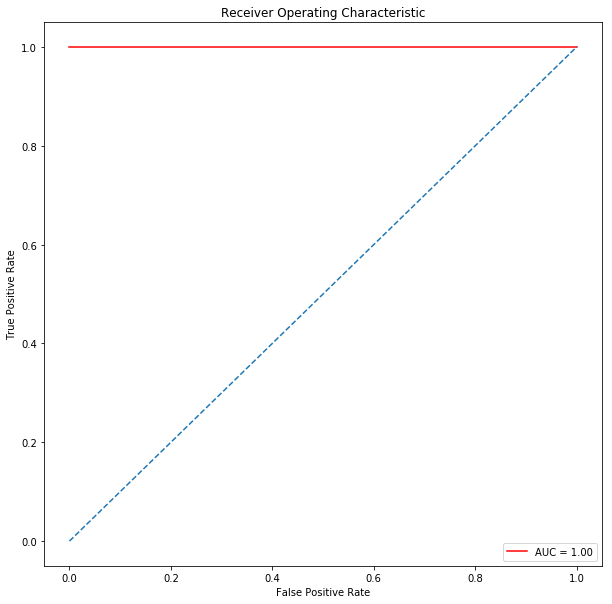

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Trying default model

In [82]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

#tuned_parameters = {'min_samples_leaf': range(5,10,5), 'n_estimators' : range(50,200,50),
                    #'max_depth': range(5,15,5), 'max_features':range(5,20,5)
                    #}
               

In [83]:
model_RR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
y_prob = model_RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_RR.score(X_test, y_pred)

1.0

In [85]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [86]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [87]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [88]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

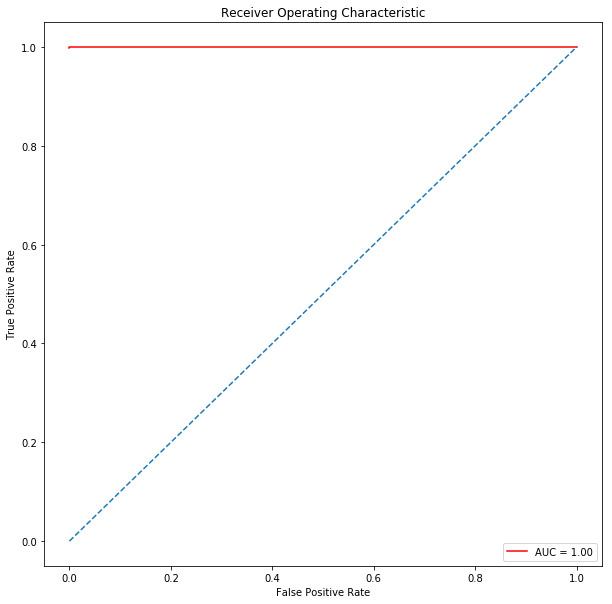

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Thus default Random forest model is giving us best accuracy.

### Let us tuned the parameters of Random Forest just for the purpose of knowledge

**There are 3 features which can be tuned to improve the performance of Random Forest**    

**1) max_features 2) n_estimators  3) min_sample_leaf**

 **A)max_features**: These are the maximum number of features Random Forest is allowed to try in individual tree.
**1)Auto** : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree.
**2)sqrt** : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree.
**3)log2**:It  is another option which takes log to the base 2 of the features input.

**Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered.But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features.**

**B) n_estimators** : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

**C)min_sample_leaf**:  Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Hence it is important to try different values to get good estimate.

In [90]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }
    

### n_jobs
**This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor.**

In [91]:
from sklearn.grid_search import RandomizedSearchCV

RR_model= RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)

In [92]:
RR_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [93]:
print(RR_model.grid_scores_)

[mean: 0.99969, std: 0.00062, params: {'n_estimators': 60, 'min_samples_leaf': 10, 'max_features': 'auto'}, mean: 0.99908, std: 0.00075, params: {'n_estimators': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt'}, mean: 0.98554, std: 0.00478, params: {'n_estimators': 20, 'min_samples_leaf': 50, 'max_features': 'log2'}, mean: 0.98092, std: 0.00516, params: {'n_estimators': 30, 'min_samples_leaf': 60, 'max_features': 'log2'}, mean: 0.99923, std: 0.00103, params: {'n_estimators': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt'}, mean: 0.98692, std: 0.00469, params: {'n_estimators': 80, 'min_samples_leaf': 50, 'max_features': 'sqrt'}, mean: 0.99831, std: 0.00128, params: {'n_estimators': 90, 'min_samples_leaf': 30, 'max_features': 'log2'}, mean: 0.99615, std: 0.00403, params: {'n_estimators': 30, 'min_samples_leaf': 30, 'max_features': 'sqrt'}, mean: 0.99923, std: 0.00124, params: {'n_estimators': 80, 'min_samples_leaf': 10, 'max_features': 'auto'}, mean: 0.97707, std: 0.00574, params:

In [94]:
print(RR_model.best_score_)

0.9996922603477458


In [95]:
print(RR_model.best_params_)

{'n_estimators': 60, 'min_samples_leaf': 10, 'max_features': 'auto'}


In [96]:
y_prob = RR_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR_model.score(X_test, y_pred)

1.0

In [97]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  1, 779]])

In [98]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [99]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.99935897435897436

In [100]:

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

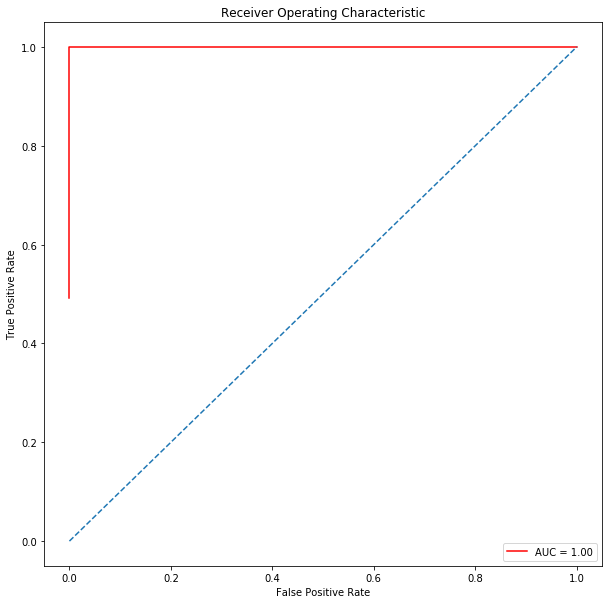

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Default Decision Tree model

In [102]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [103]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [104]:
y_prob = model_tree.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_tree.score(X_test, y_pred)

1.0

In [105]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [106]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [107]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [108]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

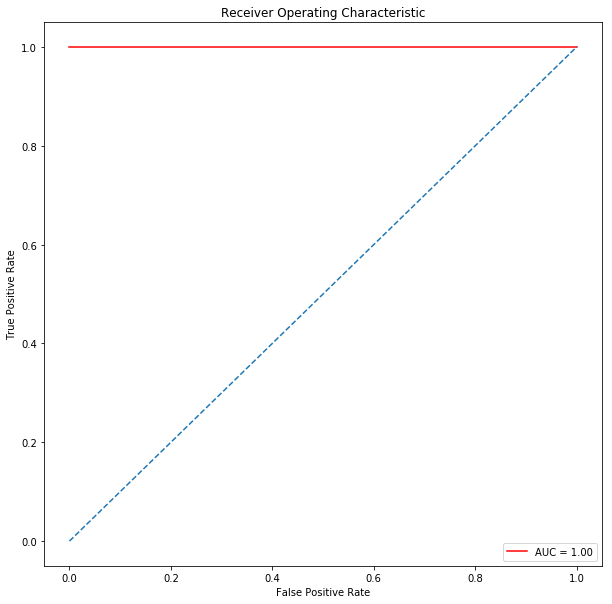

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Thus default decision tree model is giving us best accuracy score

### Let us tune the hyperparameters of the Decision tree model

**1)Criterion:** Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes.Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes. The details of Gini and entropy needs detail explanation.

2)**max_depth(Maximum depth of tree (vertical depth)):**
Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

**max_features** and **min_samples_leaf** is same as Random Forest classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier

model_DD = DecisionTreeClassifier()


tuned_parameters= {'criterion': ['gini','entropy'], 'max_features': ["auto","sqrt","log2"],
                   'min_samples_leaf': range(1,100,1) , 'max_depth': range(1,50,1)
                  }
           

In [111]:
from sklearn.grid_search import RandomizedSearchCV
DD_model= RandomizedSearchCV(model_DD, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1,random_state=5)

In [112]:
DD_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': range(1, 100), 'max_depth': range(1, 50)},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          scoring='accuracy', verbose=0)

In [113]:
print(DD_model.grid_scores_)

[mean: 0.95938, std: 0.00605, params: {'min_samples_leaf': 45, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}, mean: 0.98431, std: 0.00751, params: {'min_samples_leaf': 27, 'max_features': 'log2', 'max_depth': 14, 'criterion': 'entropy'}, mean: 0.94907, std: 0.01241, params: {'min_samples_leaf': 70, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}, mean: 0.96584, std: 0.01310, params: {'min_samples_leaf': 67, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy'}, mean: 0.95168, std: 0.01770, params: {'min_samples_leaf': 77, 'max_features': 'auto', 'max_depth': 11, 'criterion': 'gini'}, mean: 0.99646, std: 0.00301, params: {'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 31, 'criterion': 'entropy'}, mean: 0.94845, std: 0.01870, params: {'min_samples_leaf': 76, 'max_features': 'sqrt', 'max_depth': 19, 'criterion': 'gini'}, mean: 0.96138, std: 0.01064, params: {'min_samples_leaf': 67, 'max_features': 'log2', 'max_depth': 41, 'criterio

In [114]:
print(DD_model.best_score_)

0.9964609939990767


In [115]:
print(DD_model.best_params_)

{'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 31, 'criterion': 'entropy'}


In [116]:
y_prob = DD_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
DD_model.score(X_test, y_pred)

1.0

In [117]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[842,   3],
       [  2, 778]])

In [118]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [119]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.99694280078895459

In [120]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.99996662115005319

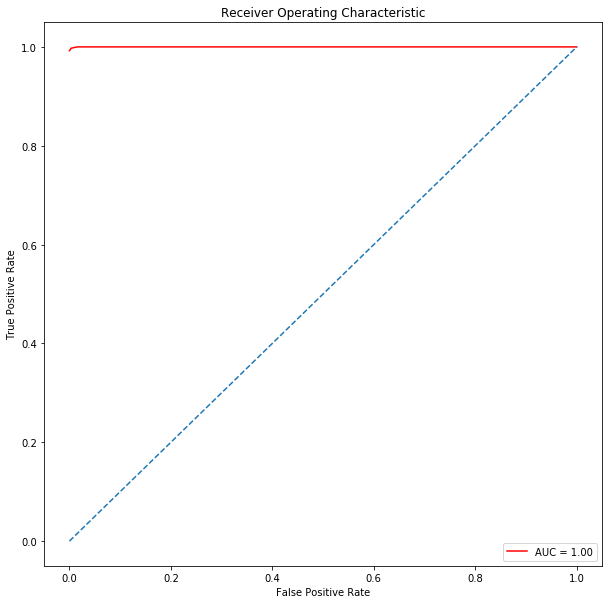

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Neural Network

### Applying default Neural Network model

In [122]:
from sklearn.neural_network import MLPClassifier

In [123]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [124]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [125]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [126]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [127]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [128]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

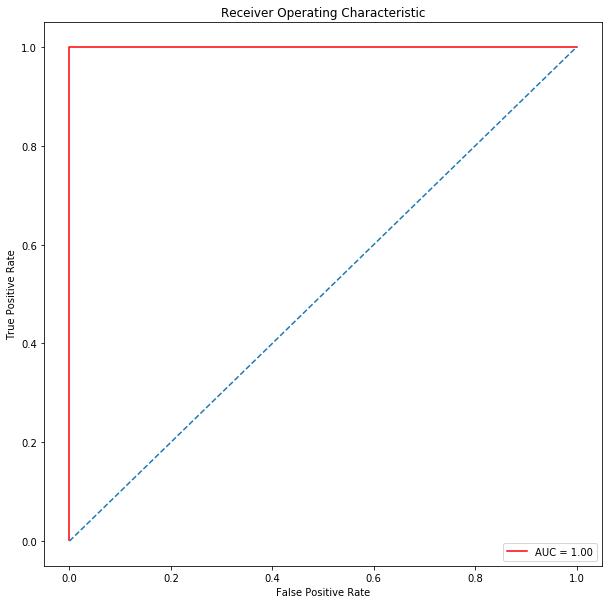

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Tuning the hyperparameters of the neural network

It is turning out to be computationally expensive for me with tuned model. Hence I am not running this. Also any suggestion to improvise it is welcome. :)

**1) hidden_layer_sizes**  : Number of hidden layers in the network.(default is 100).Large number may overfit the data.

**2)activation**: Activation function for the hidden layer.
A)‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
B)‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
C)‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

**3)alpha:** L2 penalty (regularization term) parameter.(default 0.0001)

**4)max_iter:** Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations.(default 200)

In [130]:
'''
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

tuned_parameters={'hidden_layer_sizes': range(1,200,10) , 'activation': ['tanh','logistic','relu'],
                  'alpha':[0.0001,0.001,0.01,0.1,1,10], 'max_iter': range(50,200,50)
    
}
'''

"\nfrom sklearn.neural_network import MLPClassifier\n\nmlp = MLPClassifier()\n\ntuned_parameters={'hidden_layer_sizes': range(1,200,10) , 'activation': ['tanh','logistic','relu'],\n                  'alpha':[0.0001,0.001,0.01,0.1,1,10], 'max_iter': range(50,200,50)\n    \n}\n"

In [131]:
#from sklearn.grid_search import RandomizedSearchCV
#model_mlp= RandomizedSearchCV(mlp_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=5,n_jobs= -1,random_state=5)

In [132]:
#model_mlp.fit(X_train, y_train)

In [133]:
#print(model_mlp.grid_scores_)

In [134]:
#print(model_mlp.best_score_)

In [135]:
#print(model_mlp.best_params_)

In [136]:
'''
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)
'''

'\ny_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  \ny_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.\nmodel_LR.score(X_test, y_pred)\n'

In [137]:
#confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
#confusion_matrix

In [138]:
#auc_roc=metrics.classification_report(y_test,y_pred)
#auc_roc

In [139]:
#auc_roc=metrics.roc_auc_score(y_test,y_pred)
#auc_roc

In [140]:
'''
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
'''

'\nfrom sklearn.metrics import roc_curve, auc\nfalse_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)\nroc_auc = auc(false_positive_rate, true_positive_rate)\n'

In [141]:
'''
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
'''

"\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(10,10))\nplt.title('Receiver Operating Characteristic')\nplt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)\nplt.legend(loc = 'lower right')\nplt.plot([0, 1], [0, 1],linestyle='--')\nplt.axis('tight')\nplt.ylabel('True Positive Rate')\nplt.xlabel('False Positive Rate')\n"